In [178]:
import pandas as pd
import os
import glob

In [179]:
'''
    R²
    MAE
    RMSE
    nRMSE
'''
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

def RMSE(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))
def nRMSE(rmse,y_true):
    return rmse / (max(y_true) - min(y_true))

In [180]:
csv_path = '../../ResultAnaAndProcess/ContactResult/NOAA/WS_WD_WG_WL'
csv_files = glob.glob(os.path.join(csv_path,'*.csv'))

sites_names=[]
for file in csv_files:
    file_name = os.path.basename(file)
    first_underscore_index = file_name.find("_")
    second_underscore_index = file_name.find("_", first_underscore_index + 2)
    point_index = file_name.find(".")
    site_name = file_name[second_underscore_index + 1:point_index]
    # print('For '+site_name)
    sites_names.append(site_name)
    print(site_name)

Burlington Station
HONOLULU Station
KAHUKUI Station
LaJolla Station
Nawiliwili Station


-------------
Burlington Station


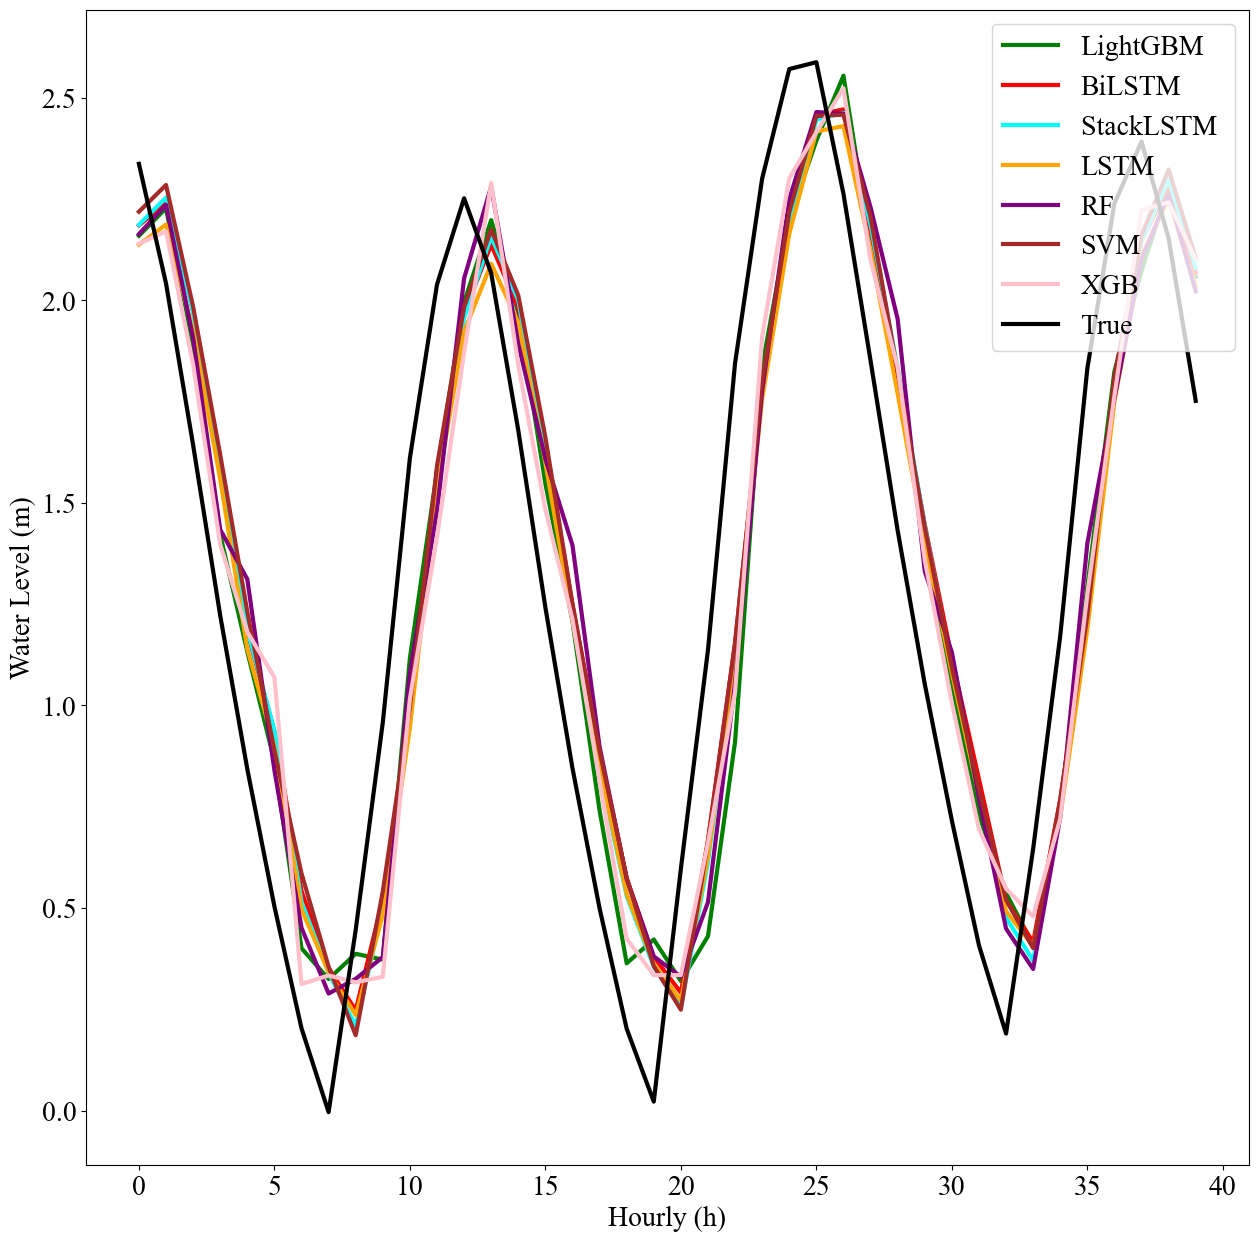

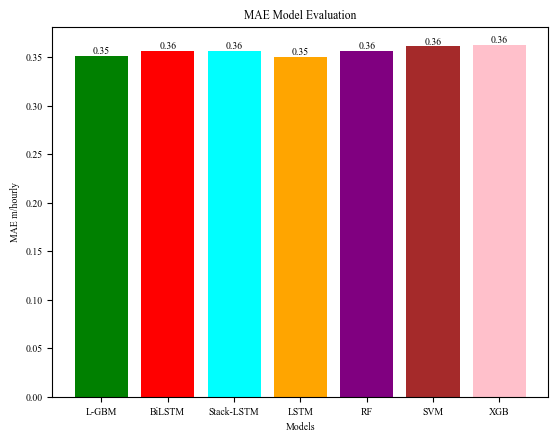

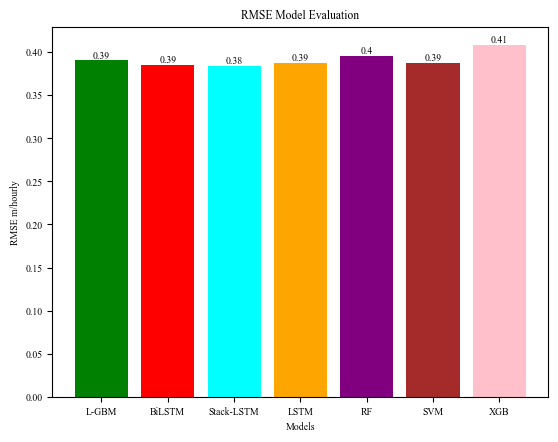

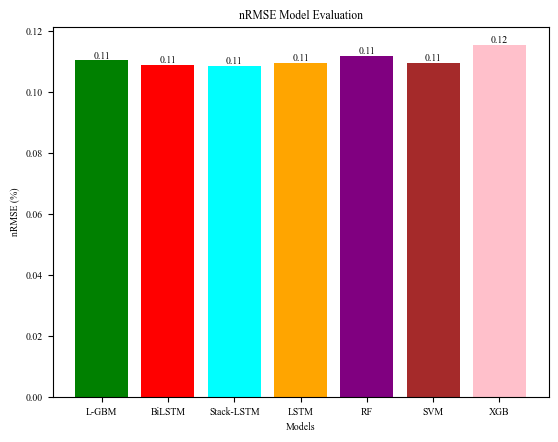

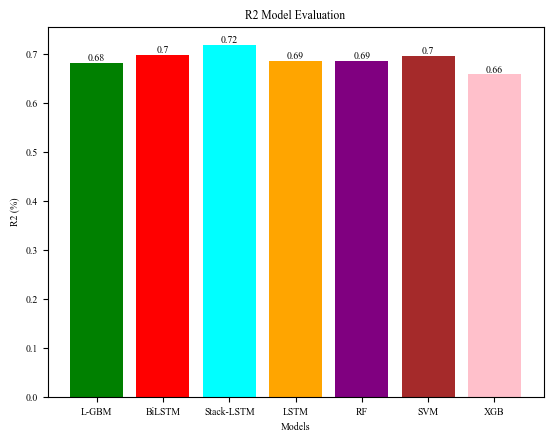

-------------
-------------
HONOLULU Station


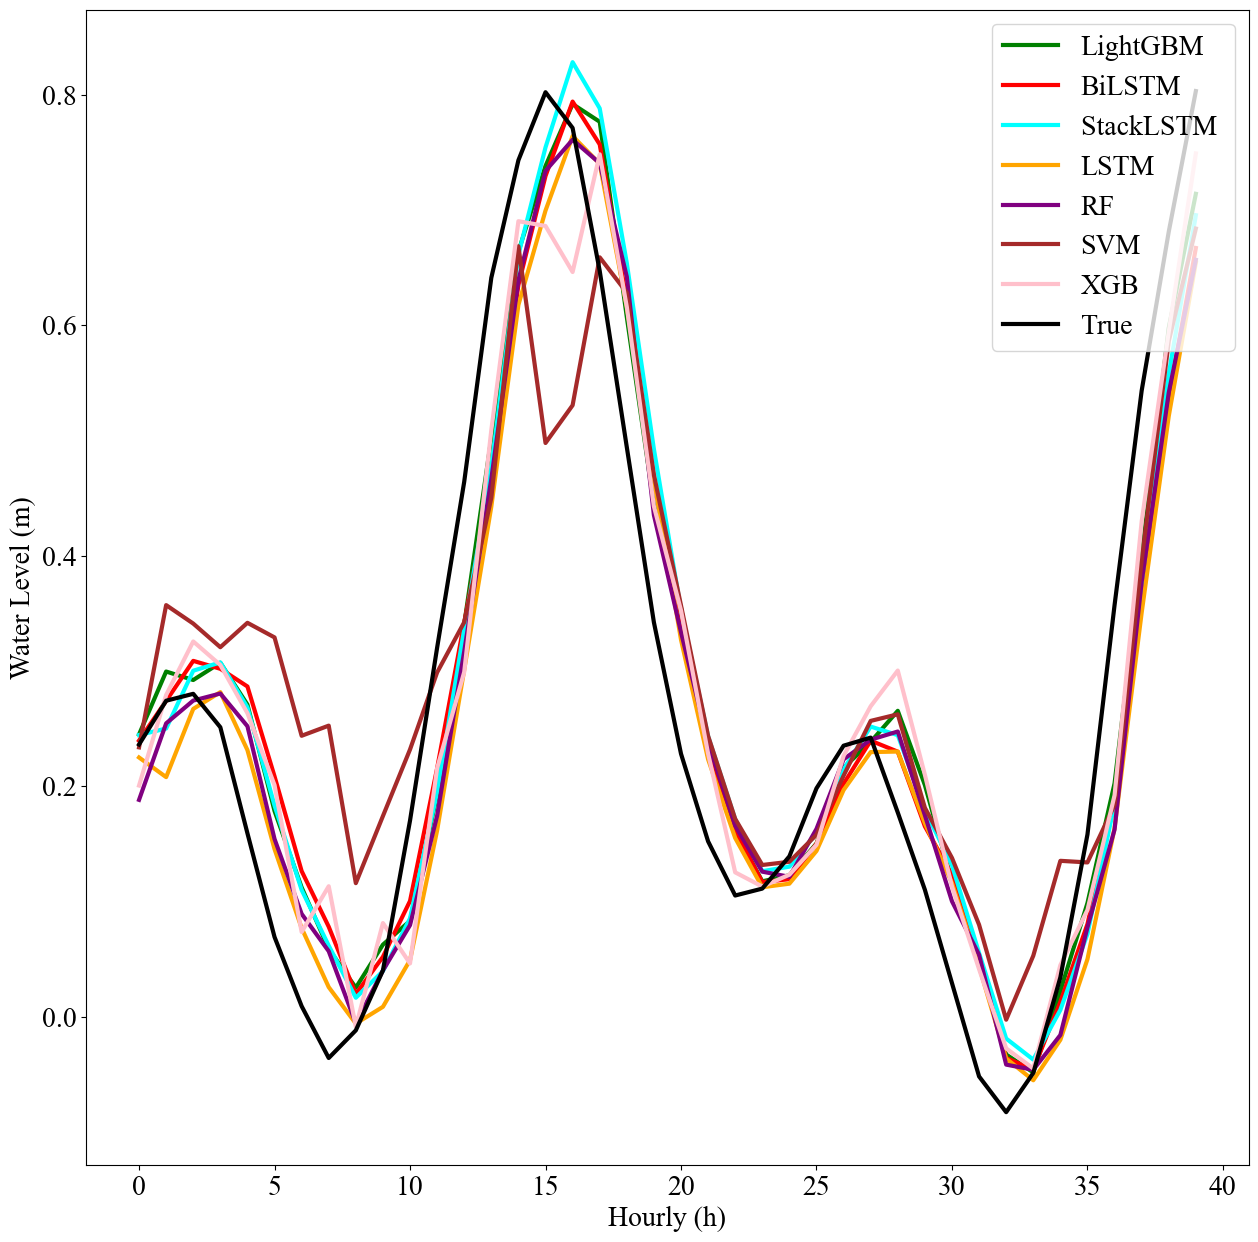

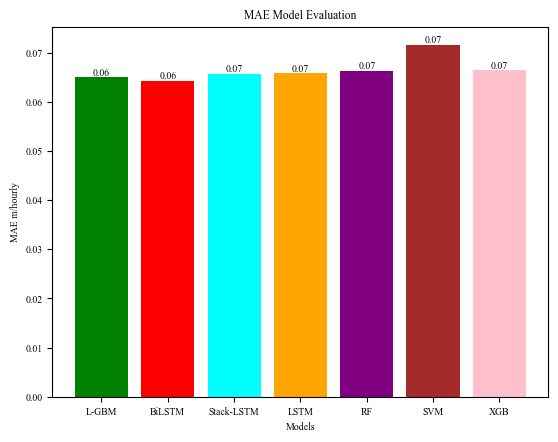

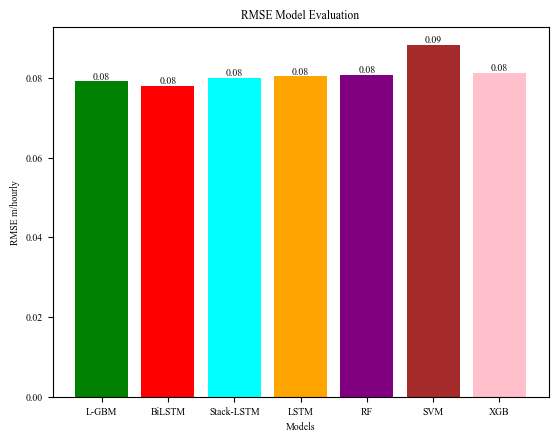

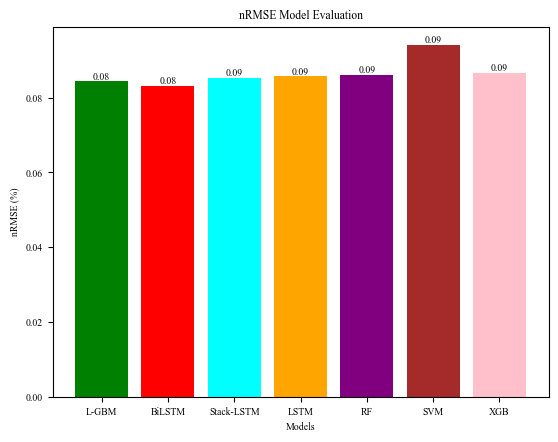

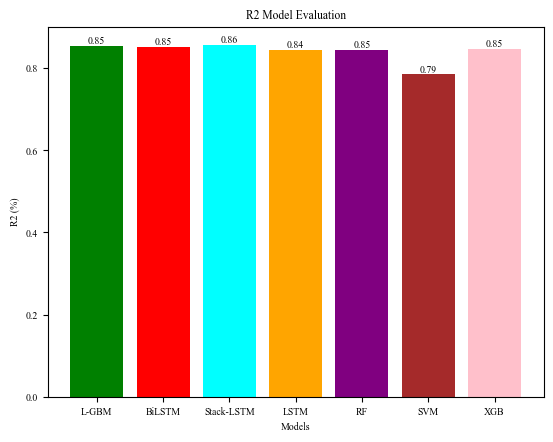

-------------
-------------
KAHUKUI Station


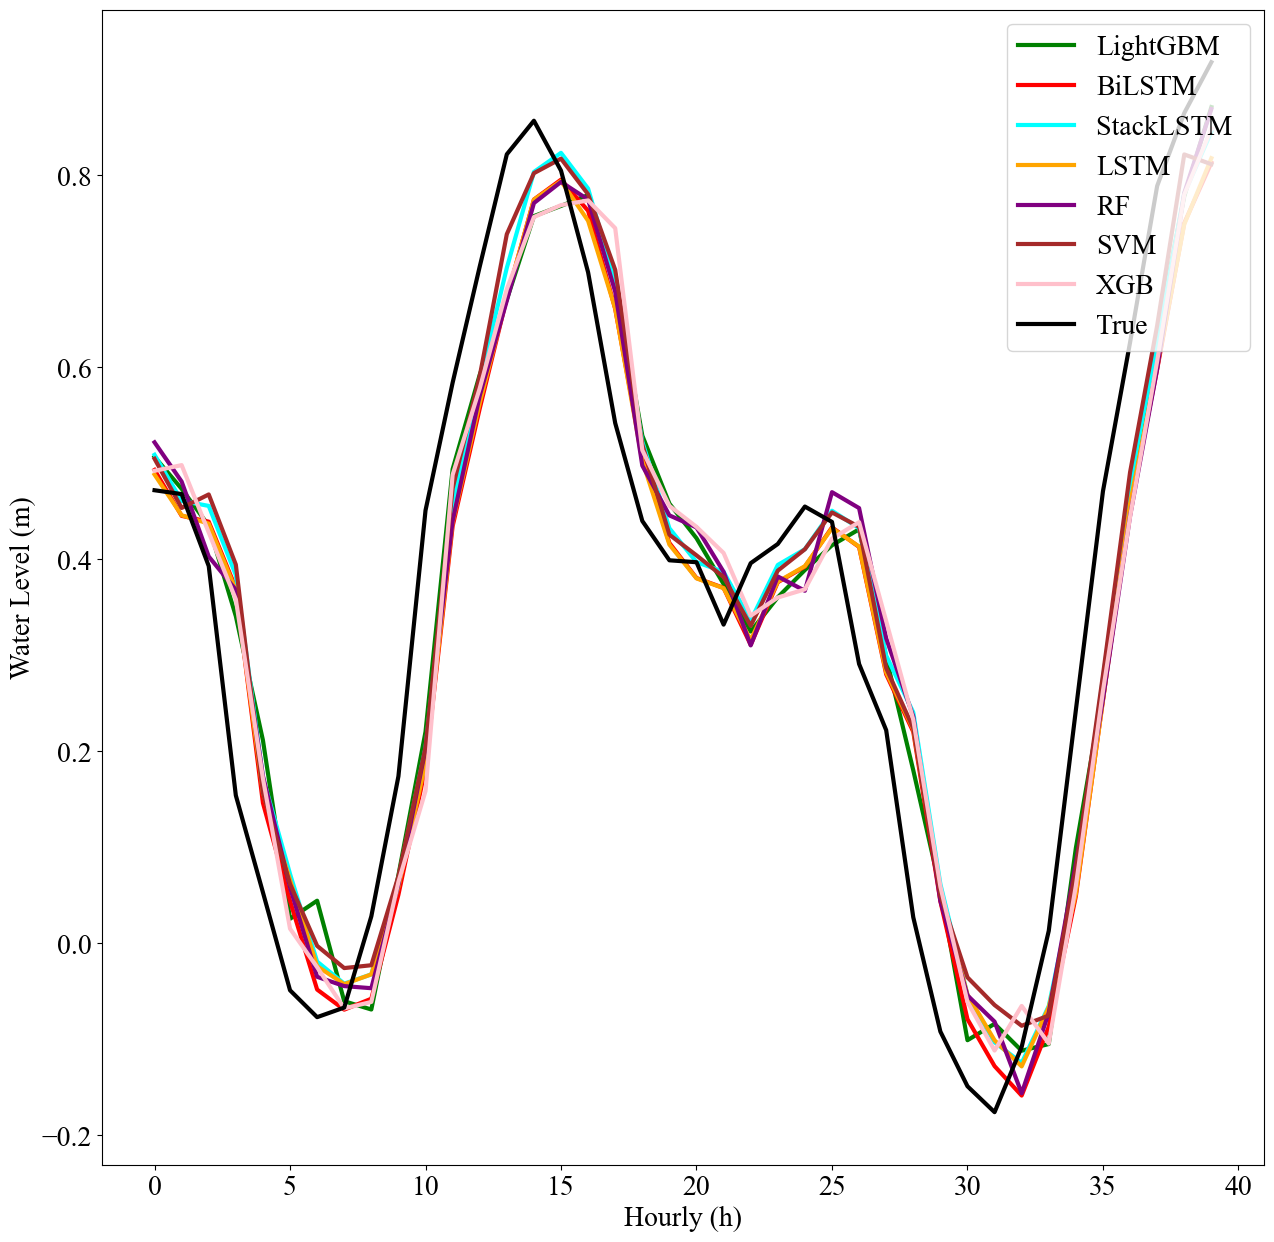

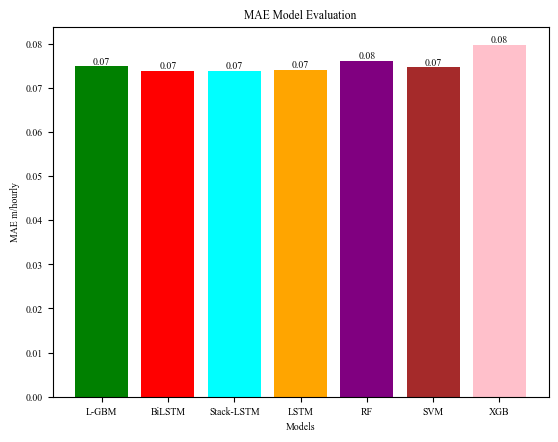

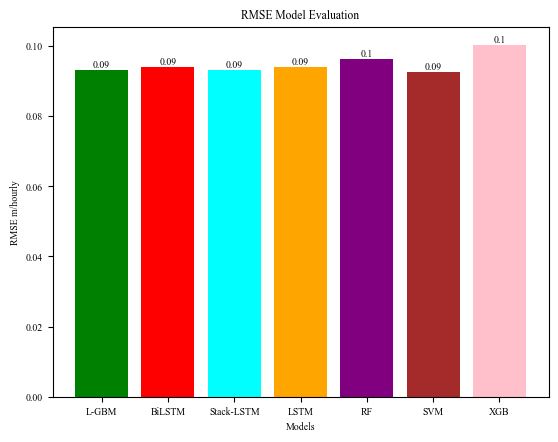

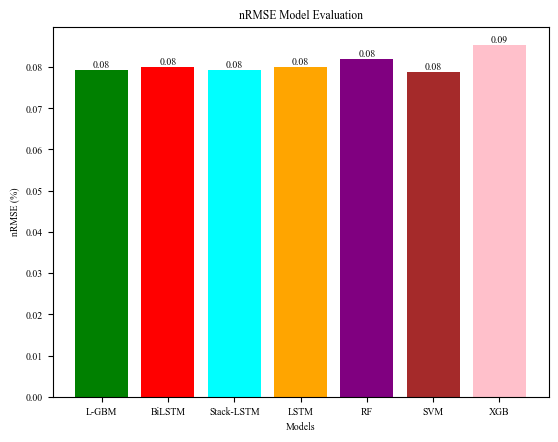

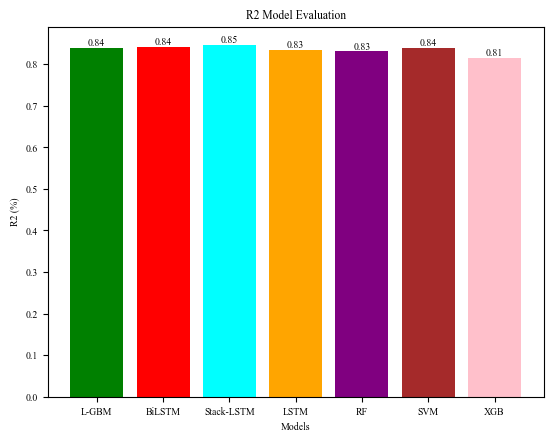

-------------
-------------
LaJolla Station


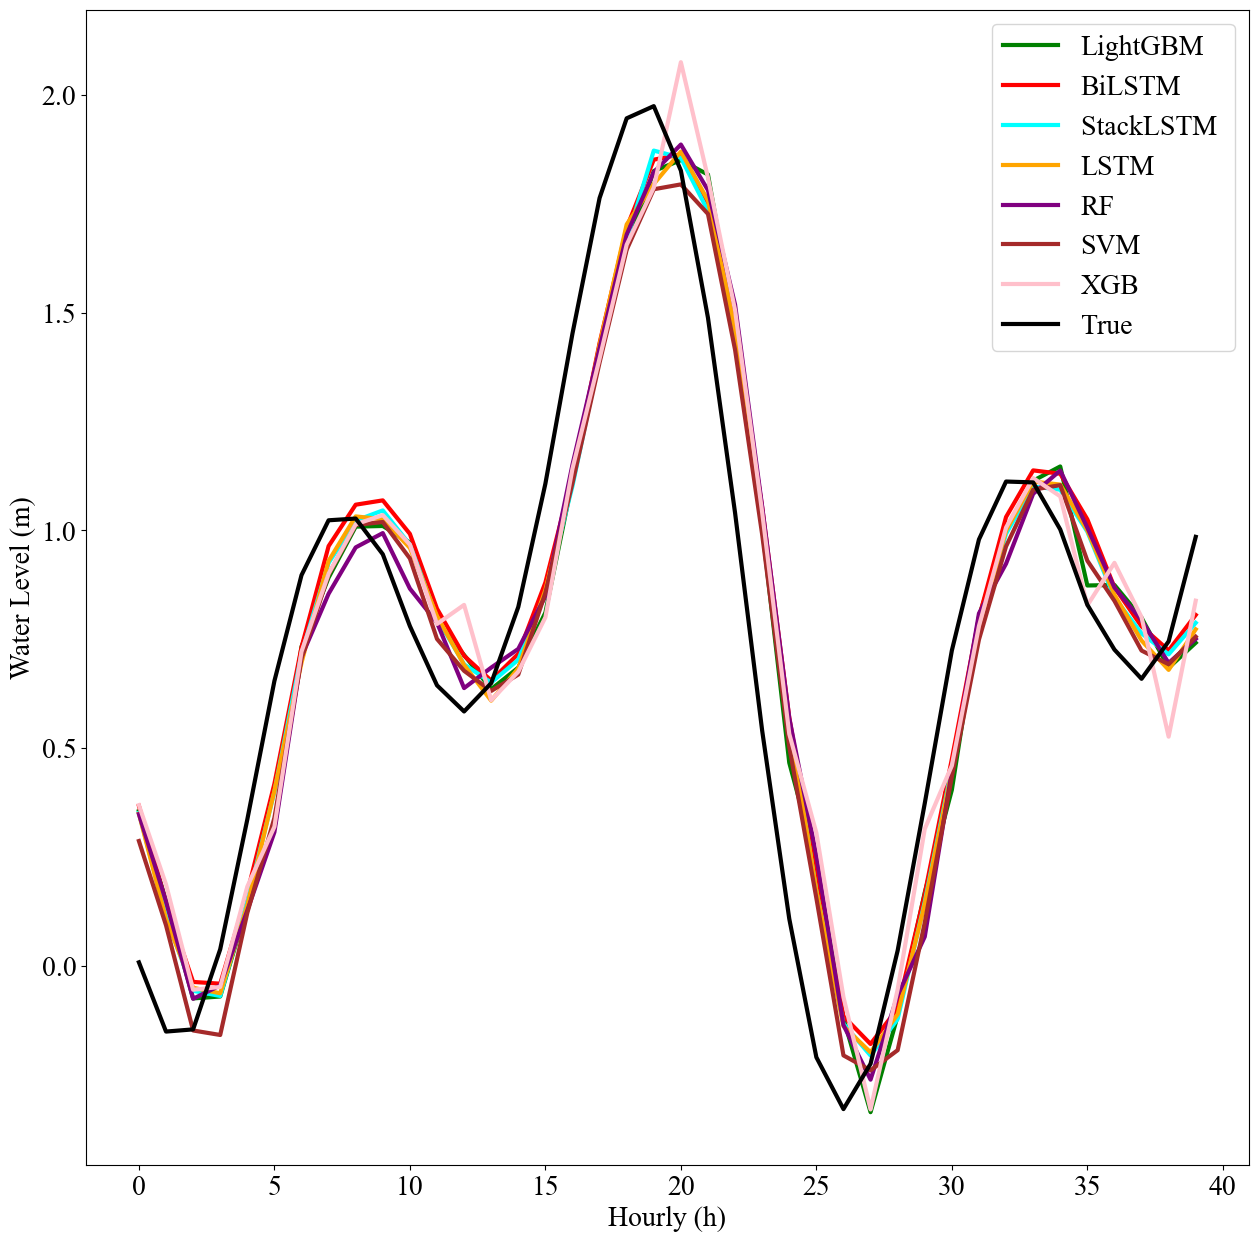

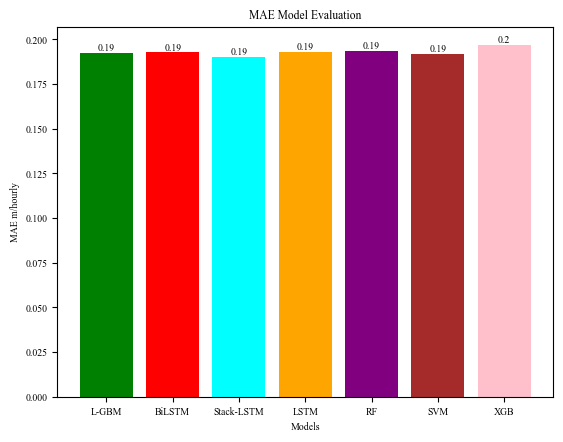

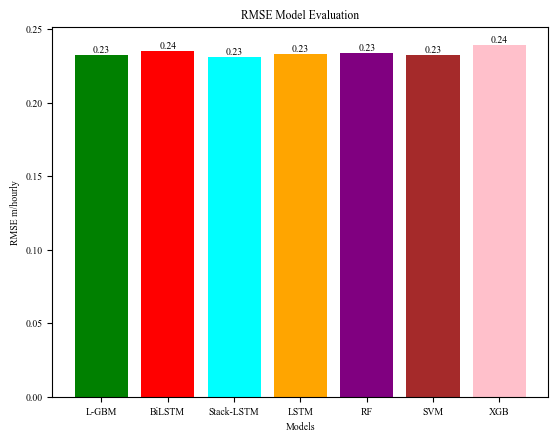

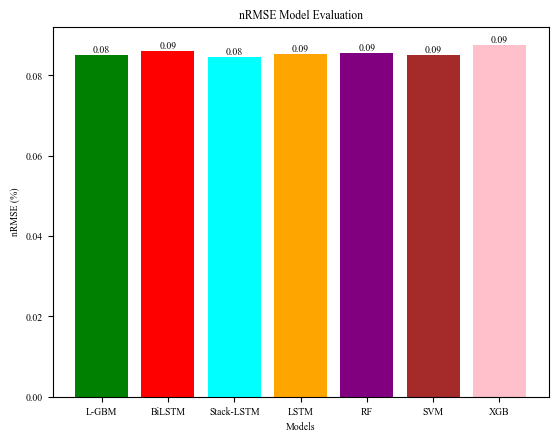

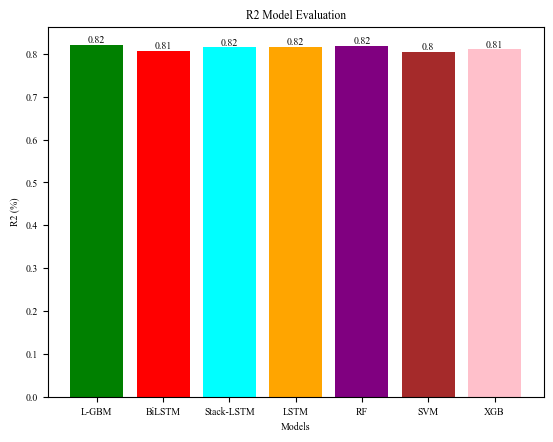

-------------
-------------
Nawiliwili Station


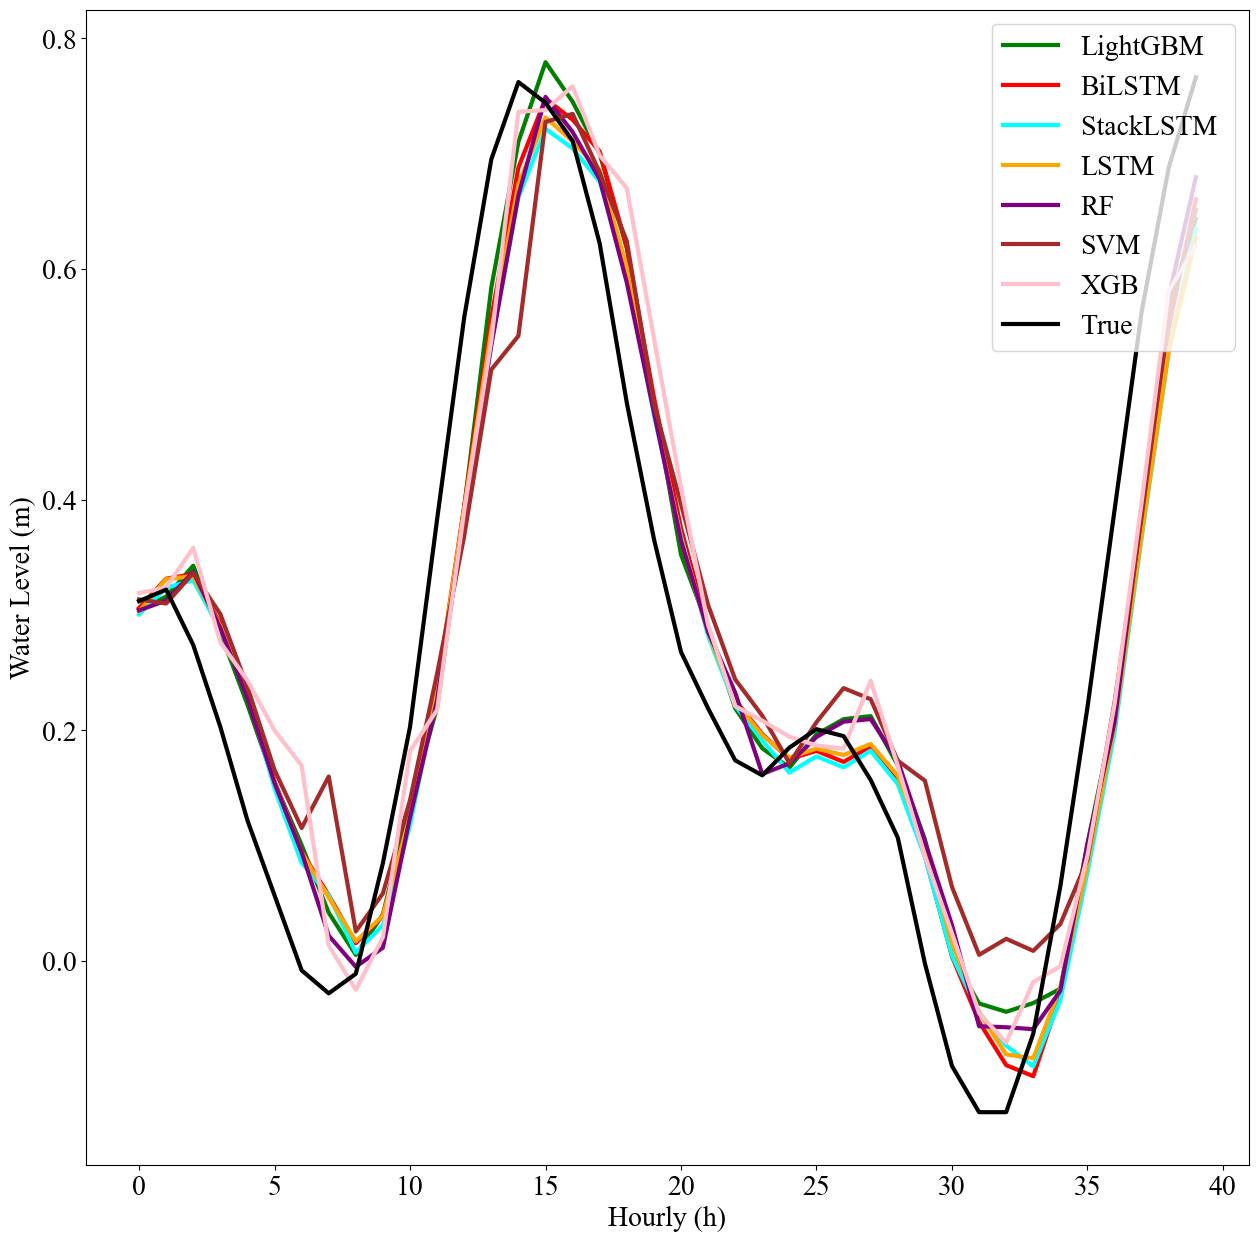

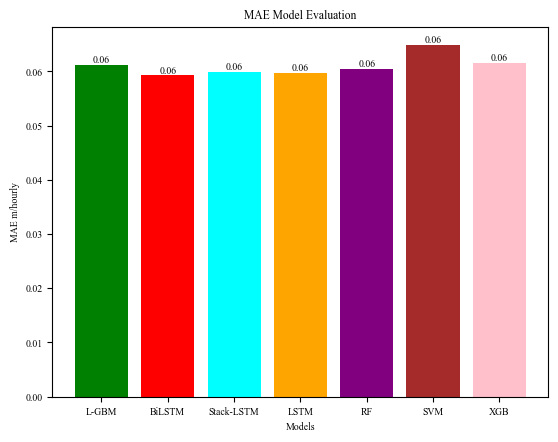

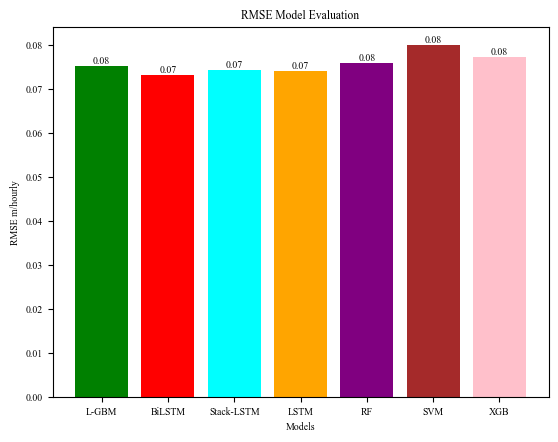

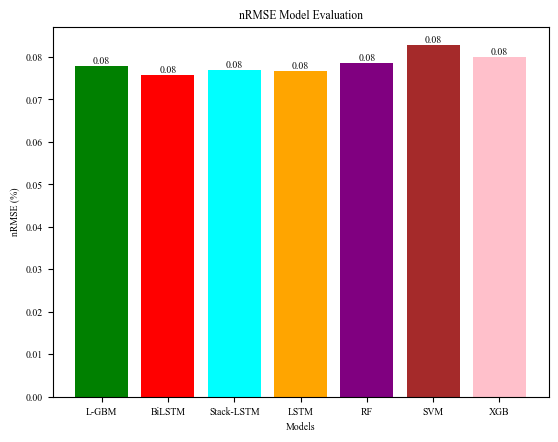

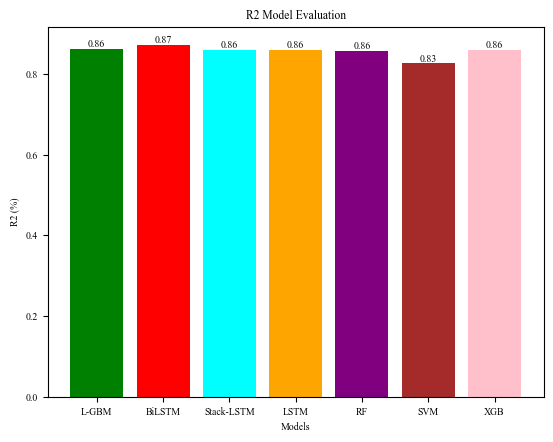

-------------


In [181]:
csv_path = '../../ResultAnaAndProcess/ContactResult/NOAA/WS_WD_WG_WL'
csv_files = glob.glob(os.path.join(csv_path,'*.csv'))

sites_names=[]

def find_site_name(file):
    file_name = os.path.basename(file)
    first_underscore_index = file_name.find("_")
    second_underscore_index = file_name.find("_", first_underscore_index + 2)
    point_index = file_name.find(".")
    site_name = file_name[second_underscore_index + 1:point_index]
    # print('For '+site_name)
    sites_names.append(site_name)
    # print("-------------------------")
    return  site_name

for file in csv_files:
 site_name = find_site_name(file)
 print('-------------')
 print(site_name)
 sw_prediction_single = pd.read_csv('../../ResultAnaAndProcess/ContactResult/NOAA/WS_WD_WG_WL/{}'.format(site_name)+'.cs.csv')

 sw_prediction_single.head()
 sw_prediction_single_pred = sw_prediction_single.iloc[:,1:8]
 sw_prediction_single_true = sw_prediction_single.iloc[:,0]

 from matplotlib import pyplot as plt
 # plt.figure(figsize=(40,15))
 fig, ax = plt.subplots(figsize=(15,15))
 plt.rc('font', family='Times New Roman', size=7)
 plt.grid(False)
 colors = ['green', 'red', 'cyan', 'orange', 'purple', 'brown', 'pink','blue']
 for attr,colors in zip(sw_prediction_single_pred,colors):
    sw_prediction_single_pred[attr]
    plt.plot(sw_prediction_single_pred[attr][0:40],label=attr,color=colors,linewidth=3)
 plt.plot(sw_prediction_single_true[0:40],label='True',color='black',linewidth=3)
 plt.legend(fontsize=20,loc='upper right', bbox_to_anchor=(1.0, 1.0))
 plt.xticks(fontsize=20)
 plt.yticks(fontsize=20)
 ax.set_xlabel('Hourly (h)',fontsize=20)
 ax.set_ylabel('Water Level (m)',fontsize=20)
 # plt.savefig('../../ResultAnaAndProcess/FinalResult_Eva/NOAA/Images/All Features/{}'.format(site_name)+'.png')
 plt.show()


 col_name = sw_prediction_single_pred.columns.values
 eva = {}
 for k in range(len(col_name)):
     eva[col_name[k]] = []

 i = 0
 for evas in eva:
     for k in range(4):
         if k==0:
             re = mean_absolute_error(sw_prediction_single_pred.iloc[:,i],sw_prediction_single_true)
         if k==1:
             re = RMSE(sw_prediction_single_pred.iloc[:,i],sw_prediction_single_true)
         if k==2:
             re =nRMSE(RMSE(sw_prediction_single_pred.iloc[:,i],sw_prediction_single_true),sw_prediction_single_true)
         if k==3:
             re = r2_score(sw_prediction_single_pred.iloc[:,i],sw_prediction_single_true)
         eva[evas].append(re)
     i+=1

 model_eva_index = pd.DataFrame(eva)

 # 插入新列
 model_eva_index.insert(0, "Index", ['MAE','RMSE','nRMSE','R2'])

 # model_eva_index.to_csv('../../ResultAnaAndProcess/FinalResult_Eva/NOAA/WL_WS_AT/{}'.format(site_name)+'.csv', index=False, header=True)

 # model_index = pd.read_csv('../../ResultAnaAndProcess/FinalResult_Eva/NOAA/WL_WS_AT/{}'.format(site_name)+'.csv')
 model_index = model_eva_index
 model_eva_data = [model_index.iloc[0:1,1:],model_index.iloc[1:2,1:],model_index.iloc[2:3,1:],model_index.iloc[3:4,1:]]

 import matplotlib.pyplot as plt
 import numpy as np
 # 修改列名-简写
 columns = ['L-GBM', 'BiLSTM', 'Stack-LSTM','LSTM' ,'RF', 'SVM', 'XGB']
 counter = 1
 for index,data in zip(model_index['Index'],model_eva_data):

     # 创建图形对象
     fig, ax = plt.subplots()

     # 生成不同的颜色
     # colors = plt.cm.get_cmap('tab10', len(columns))
     colors = ['green', 'red', 'cyan', 'orange', 'purple', 'brown', 'pink']
     # 绘制柱状图
     bars = ax.bar(columns, data.values[0], color=colors)

     # 在每个柱子上显示具体数字
     for bar in bars:
         height = bar.get_height()
         ax.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2),
                 ha='center', va='bottom')

     # 设置标题和标签
     ax.set_title(index+' Model Evaluation')
     ax.set_xlabel('Models')
     if index!='nRMSE' and index!='R2':
         ax.set_ylabel(index+' m/hourly')
     else:
         ax.set_ylabel(index+' (%)')
     # 将 x 轴标签旋转 45 度
     # ax.set_xticklabels(columns, rotation=90)
     # 显示图形
     # plt.savefig('../../ResultAnaAndProcess/FinalResult_Eva/NOAA/Images/WL_WS_AT/AnaSt_{}'.format(site_name)+str(counter)+'.png',dpi=600)
     counter += 1
     plt.show()

 print('-------------')

In [156]:
sw_prediction_single = pd.read_csv('../ContactResult/Delete-9999/BE-Vie.csv')

In [102]:
sw_prediction_single.head()

,BiLSTM,StackLSTM,LSTM,TRUE
0,24.870739,24.901546,25.643782,29.137931
1,26.335867,26.561815,27.926468,31.034483
2,27.826868,28.010443,29.321106,25.431034
3,24.713362,24.289694,24.515182,18.706897
4,19.744558,19.533270,19.050865,24.655172


In [105]:
# sw_prediction_single.head()
sw_prediction_single_pred = sw_prediction_single.iloc[:,0:3]
sw_prediction_single_true = sw_prediction_single.iloc[:,3]

In [106]:
sw_prediction_single.describe()

,BiLSTM,StackLSTM,LSTM,TRUE
count,300.000000,300.000000,300.000000,300.000000
mean,26.378970,27.094257,28.426417,27.812572
std,17.806124,18.012271,17.782855,19.604824
min,1.658245,3.327837,3.194254,2.327586
25%,11.261138,11.751337,13.643743,11.336207
50%,23.301357,23.631878,24.991446,23.362069
75%,38.918908,39.452852,41.431908,43.211207
max,69.230100,71.130840,71.046820,72.068966


In [107]:
sw_prediction_single_pred

,BiLSTM,StackLSTM,LSTM
0,24.870739,24.901546,25.643782
1,26.335867,26.561815,27.926468
2,27.826868,28.010443,29.321106
3,24.713362,24.289694,24.515182
4,19.744558,19.533270,19.050865
...,...,...,...
295,25.395016,26.141380,26.689135
296,18.845226,18.865690,18.724764
297,14.235352,13.616809,15.721184
298,15.331760,16.493698,17.639874


In [108]:
print(sw_prediction_single_true)

0      29.137931
1      31.034483
2      25.431034
3      18.706897
4      24.655172
         ...    
295    17.500000
296    14.655172
297    15.344828
298    18.448276
299     6.379310
Name: TRUE, Length: 300, dtype: float64


In [109]:
for attr in sw_prediction_single_pred:
    print(sw_prediction_single_pred[attr])

0      24.870739
1      26.335867
2      27.826868
3      24.713362
4      19.744558
         ...    
295    25.395016
296    18.845226
297    14.235352
298    15.331760
299    19.093420
Name: BiLSTM, Length: 300, dtype: float64
0      24.901546
1      26.561815
2      28.010443
3      24.289694
4      19.533270
         ...    
295    26.141380
296    18.865690
297    13.616809
298    16.493698
299    19.769508
Name: StackLSTM , Length: 300, dtype: float64
0      25.643782
1      27.926468
2      29.321106
3      24.515182
4      19.050865
         ...    
295    26.689135
296    18.724764
297    15.721184
298    17.639874
299    21.115557
Name: LSTM, Length: 300, dtype: float64


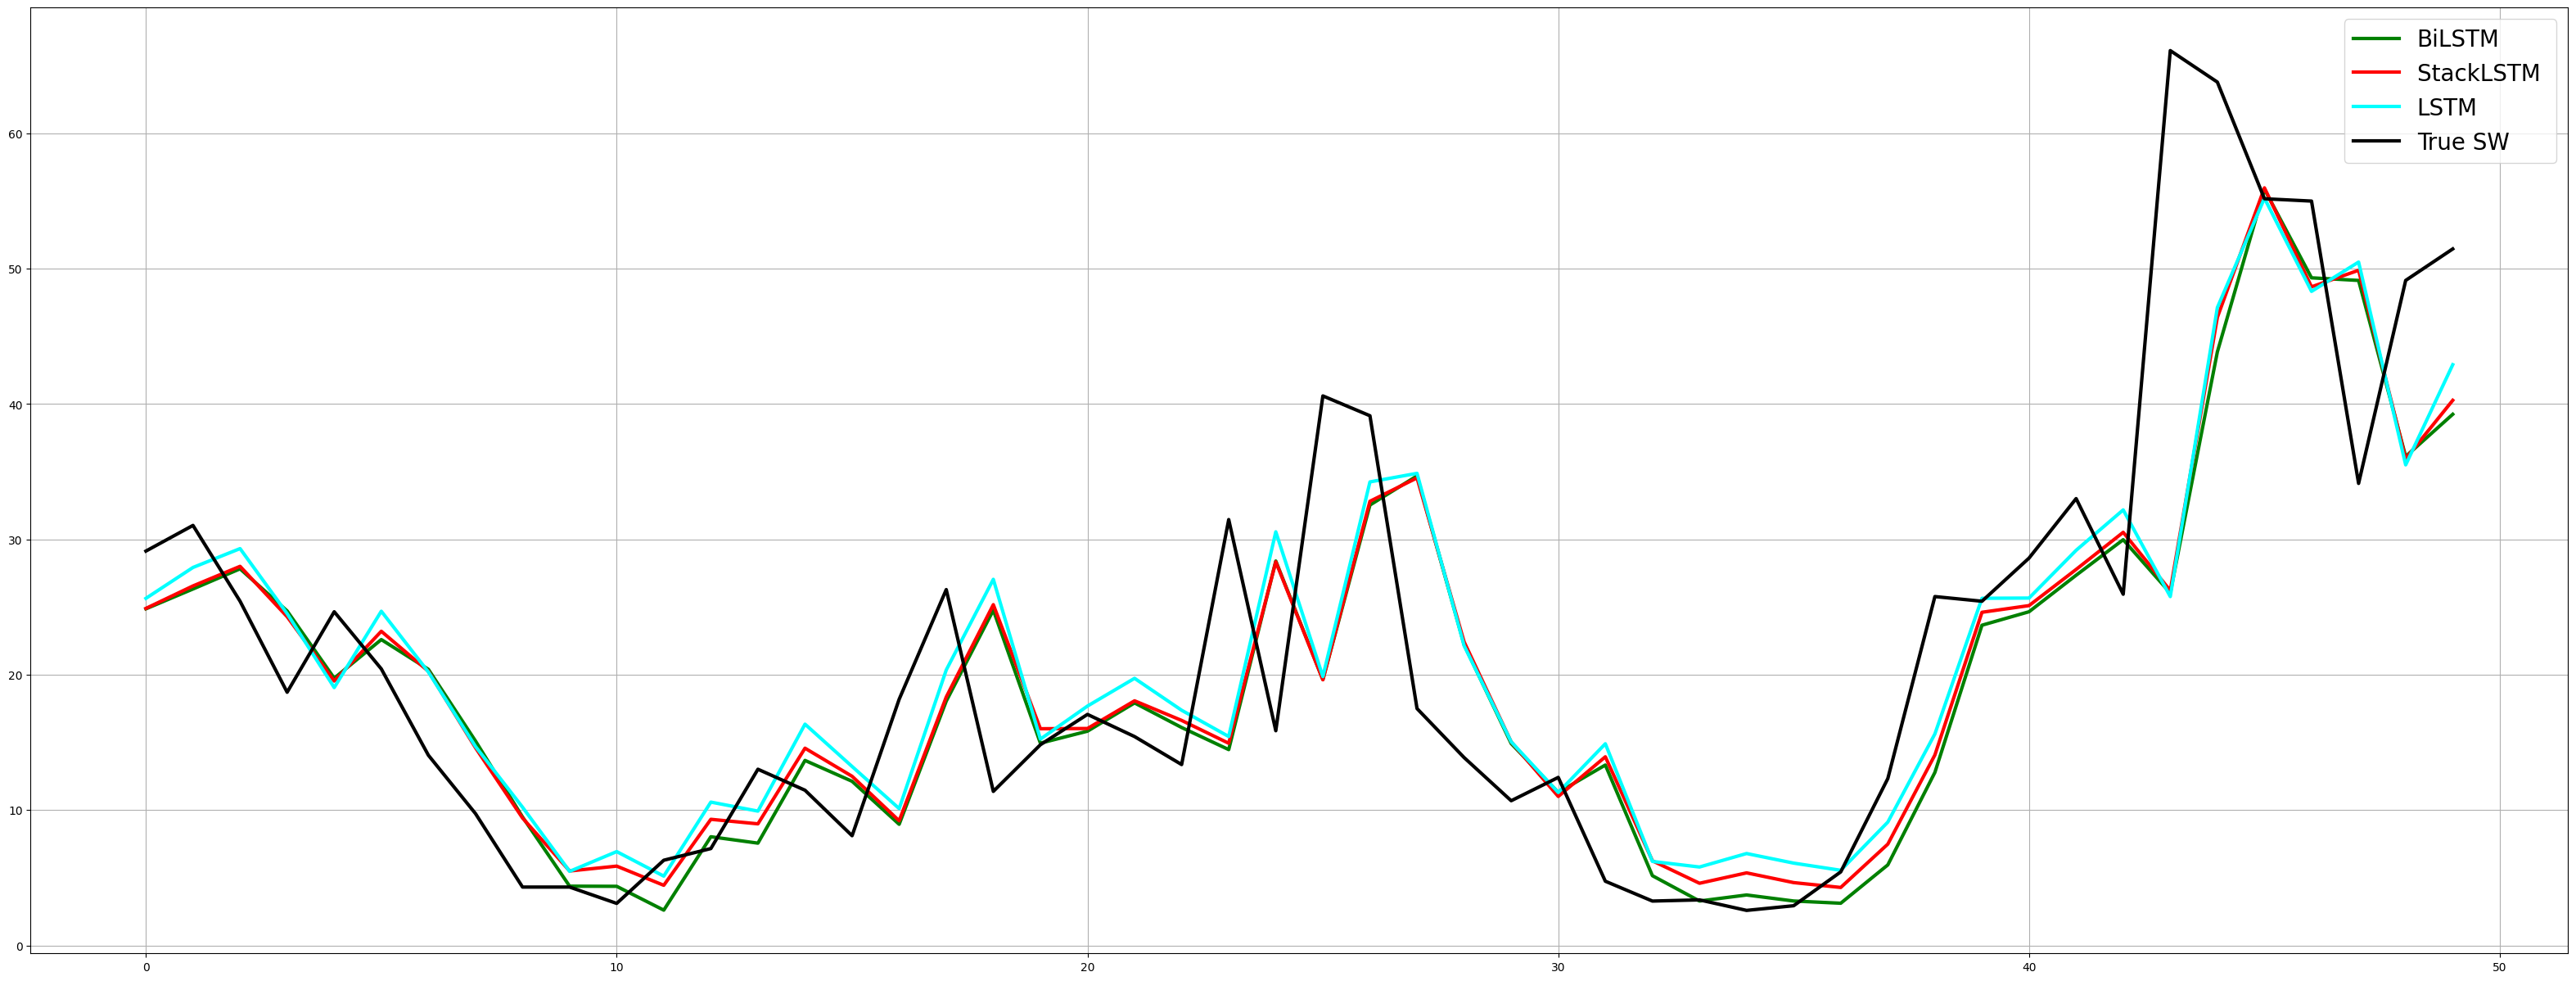

In [110]:
from matplotlib import pyplot as plt
plt.figure(figsize=(40,15))
plt.grid(True)
colors = ['green', 'red', 'cyan', 'orange', 'purple', 'brown', 'pink','blue']
for attr,colors in zip(sw_prediction_single_pred,colors):
    sw_prediction_single_pred[attr]
    plt.plot(sw_prediction_single_pred[attr][0:50],label=attr,color=colors,linewidth=3)
plt.plot(sw_prediction_single_true[0:50],label='True SW',color='black',linewidth=3)
plt.legend(fontsize=20)
# plt.savefig('Result_SW_TA.png')
plt.show()


### 计算模型评价指标

In [111]:
'''
    R²
    MAE
    RMSE
    nRMSE
'''
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

def RMSE(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))
def nRMSE(rmse,y_true):
    return rmse / (max(y_true) - min(y_true))

In [112]:
col_name = sw_prediction_single_pred.columns.values
eva = {}
for k in range(len(col_name)):
    eva[col_name[k]] = []


In [113]:
eva

{'BiLSTM': [], 'StackLSTM ': [], 'LSTM': []}

In [114]:
sw_prediction_single_pred.iloc[:,0]

0      24.870739
1      26.335867
2      27.826868
3      24.713362
4      19.744558
         ...    
295    25.395016
296    18.845226
297    14.235352
298    15.331760
299    19.093420
Name: BiLSTM, Length: 300, dtype: float64

In [115]:
i = 0
for evas in eva:
    for k in range(4):
        if k==0:
            re = mean_absolute_error(sw_prediction_single_pred.iloc[:,i],sw_prediction_single_true)
        if k==1:
            re = RMSE(sw_prediction_single_pred.iloc[:,i],sw_prediction_single_true)
        if k==2:
            re =nRMSE(RMSE(sw_prediction_single_pred.iloc[:,i],sw_prediction_single_true),sw_prediction_single_true)
        if k==3:
            re = r2_score(sw_prediction_single_pred.iloc[:,i],sw_prediction_single_true)
        eva[evas].append(re)
    i+=1

In [116]:
eva

{'BiLSTM': [5.650926421076667,
  8.616366382066229,
  0.1235474042375315,
  0.7650585777690291],
 'StackLSTM ': [5.561111919609999,
  8.5454644234549,
  0.12253076305105425,
  0.7741685245581759],
 'LSTM': [5.639008500349999,
  8.400582390579862,
  0.12045334453277678,
  0.7760939124444542]}

In [117]:
df = pd.DataFrame(eva)

# 插入新列
df.insert(0, "Index", ['MAE','RMSE','nRMSE','R2'])

df.to_csv('Model_Index_Delete.csv', index=False, header=True)


In [118]:
model_index = pd.read_csv('Model_Index_Delete.csv')

In [119]:
model_index.head()

,Index,BiLSTM,StackLSTM,LSTM
0,MAE,5.650926,5.561112,5.639009
1,RMSE,8.616366,8.545464,8.400582
2,nRMSE,0.123547,0.122531,0.120453
3,R2,0.765059,0.774169,0.776094


In [166]:
# model_index = pd.read_csv('Model_Index.csv')

In [167]:
# model_index.head()

### 创建3D图

In [168]:
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
#
# #创建网格
# X,Y = range(len(model_index.columns)-1),range(len(model_index.iloc[0,:]))
# X,Y = np.meshgrid(len(model_index.columns)-1),range(len(model_index.iloc[0,:]))
#
# #Data
# Z = model_index.iloc[:,1:]
#
# #Paint 3D 柱状图
# ax.bar3d(X.flatten(), Y.flatten(), 0, 0.8, 0.8, Z.flatten(), shade=True)
#
# # 设置坐标轴标签
# ax.set_xlabel('Models')
# ax.set_ylabel('Metrics')
# ax.set_zlabel('Values')
#
# # 设置刻度标签
# ax.set_xticks(range(len(model_index.columns.values)))
# ax.set_yticks(range(len(model_index.iloc[0,:])))
# ax.set_xticklabels(model_index.columns.values)
# ax.set_yticklabels(model_index.iloc[0,:])
#
# # 标题
# plt.title('Model Evaluation')
#
# # 显示图形
# plt.show()

In [169]:
model_eva_data = [model_index.iloc[0:1,1:],model_index.iloc[1:2,1:],model_index.iloc[2:3,1:],model_index.iloc[3:4,1:]]
# for index,data in zip(model_index['Index'],model_index.iloc[:,1:]):
#     print('-----------')
#     print(index)
#     print(data)
#     print('-----------')

In [170]:
model_eva_data[3]

,LightGBM,BiLSTM,StackLSTM,LSTM,RF,SVM,XGB
3,0.950898,0.958372,0.949147,0.954521,0.952828,0.896974,0.955151


C:\Users\AnleHrc\AppData\Local\Temp\ipykernel_773744\1138826080.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(columns))


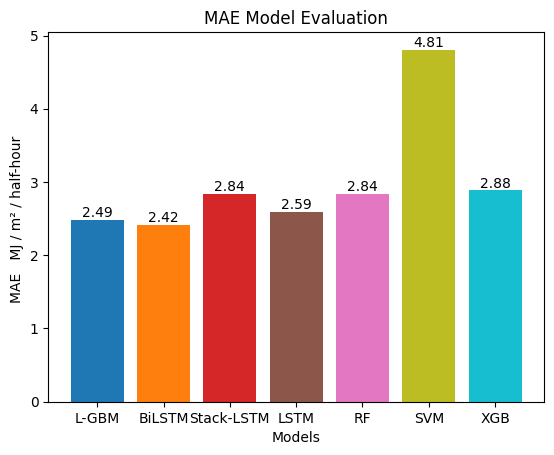

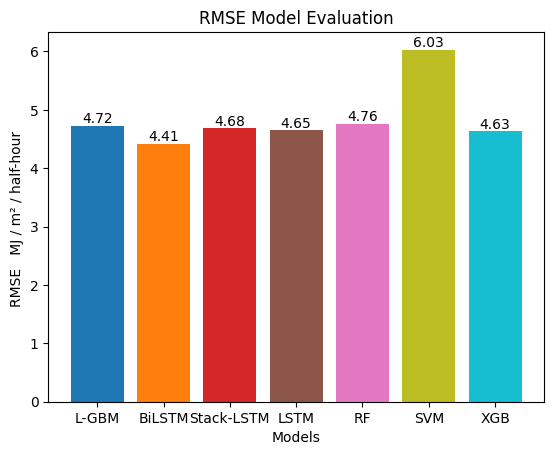

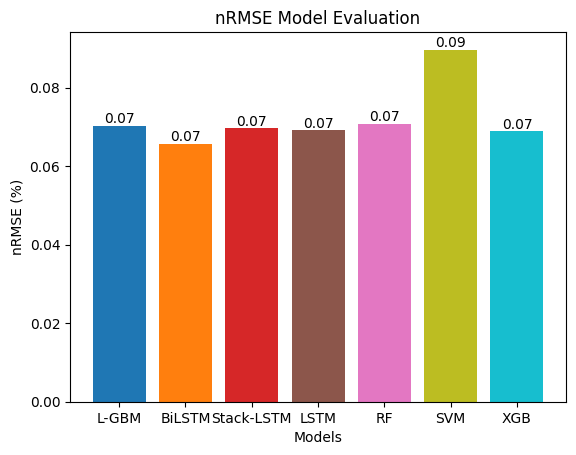

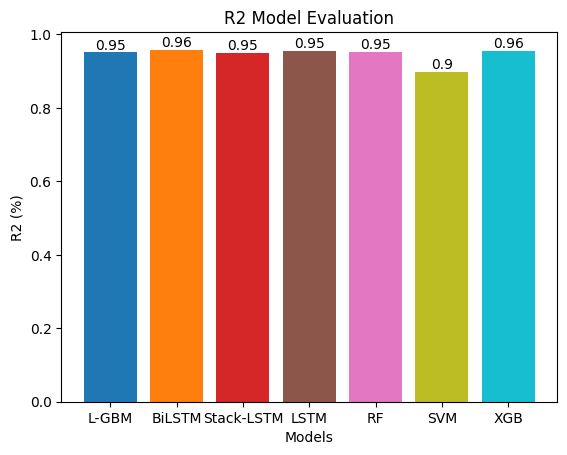

In [171]:
import matplotlib.pyplot as plt
import numpy as np
# 修改列名-简写
columns = ['L-GBM', 'BiLSTM', 'Stack-LSTM','LSTM' ,'RF', 'SVM', 'XGB']
for index,data in zip(model_index['Index'],model_eva_data):

    # 创建图形对象
    fig, ax = plt.subplots()

    # 生成不同的颜色
    colors = plt.cm.get_cmap('tab10', len(columns))

    # 绘制柱状图
    bars = ax.bar(columns, data.values[0], color=colors(range(len(columns))))

    # 在每个柱子上显示具体数字
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2),
                ha='center', va='bottom')

    # 设置标题和标签
    ax.set_title(index+' Model Evaluation')
    ax.set_xlabel('Models')
    if index!='nRMSE' and index!='R2':
        ax.set_ylabel(index+'   MJ / m² / half-hour ')
    else:
        ax.set_ylabel(index+' (%)')
    # 将 x 轴标签旋转 45 度
    # ax.set_xticklabels(columns, rotation=90)
    # 显示图形
    plt.show()
